# EDA — Heart Failure Prediction

This notebook presents a comprehensive **Exploratory Data Analysis (EDA)** on the *Heart Failure Prediction* dataset.  
The goal is to explore and understand the key patterns, distributions, and relationships among patient health features that may influence the presence of heart disease.

Through statistical summaries and visual insights, we will:
- Examine the structure and quality of the dataset.
- Explore distributions of numerical and categorical variables.
- Analyze correlations between features and the target variable.
- Identify potential trends and anomalies relevant for further modeling.

> Dataset: `heart.csv`


## 1. Setup
Import core libraries (pandas, numpy, matplotlib) and set basic display options.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

## 2. Load dataset
Load `heart.csv`.

In [3]:
from pathlib import Path

DATA_PATH = Path("../data/raw/heart.csv")

df = pd.read_csv(DATA_PATH)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 3. Initial overview
Quick check of shape, column names, data types, and missing values to understand the raw structure.

In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values ​​per column:")
print(df.isnull().sum())

Shape: (918, 12)

Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Missing values ​​per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## 4. Descriptive statistics
View summary statistics for numerical and categorical columns to understand central tendency and spread.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


## 5. Target distribution (HeartDisease)
Visualize the balance between the two classes (0 = Healthy, 1 = Disease).

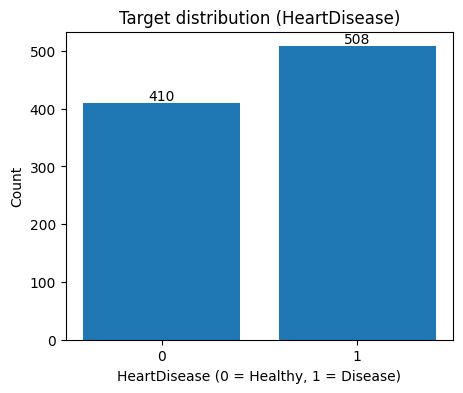

In [6]:
counts = df['HeartDisease'].value_counts().sort_index()
fig = plt.figure(figsize=(5,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Target distribution (HeartDisease)')
plt.xlabel('HeartDisease (0 = Healthy, 1 = Disease)')
plt.ylabel('Count')
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## 6. Sex distribution
Inspect the distribution of the `Sex` feature.

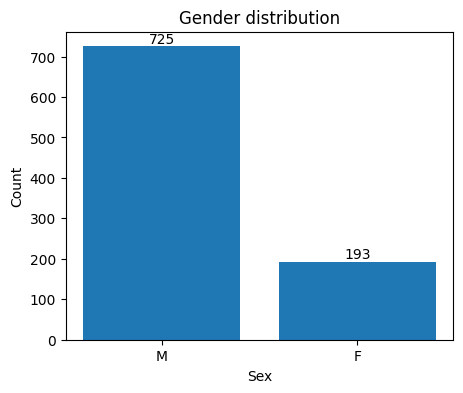

In [7]:
counts = df['Sex'].value_counts()
fig = plt.figure(figsize=(5,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Gender distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

## 7. Age distribution
Histogram of patient age to assess its range and concentration.

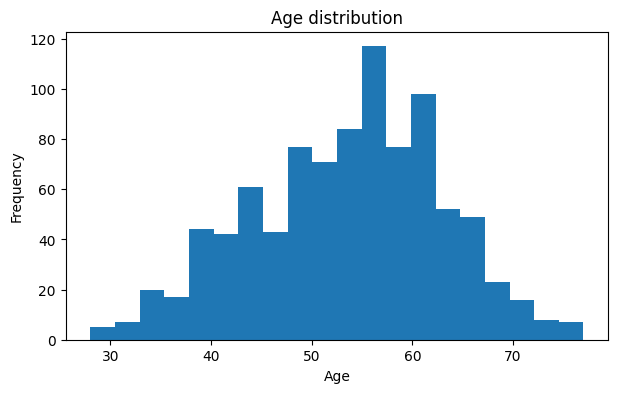

In [8]:
fig = plt.figure(figsize=(7,4))
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 8. Correlation matrix (numerical features)
Compute and visualize correlations among numerical features to spot linear relationships.

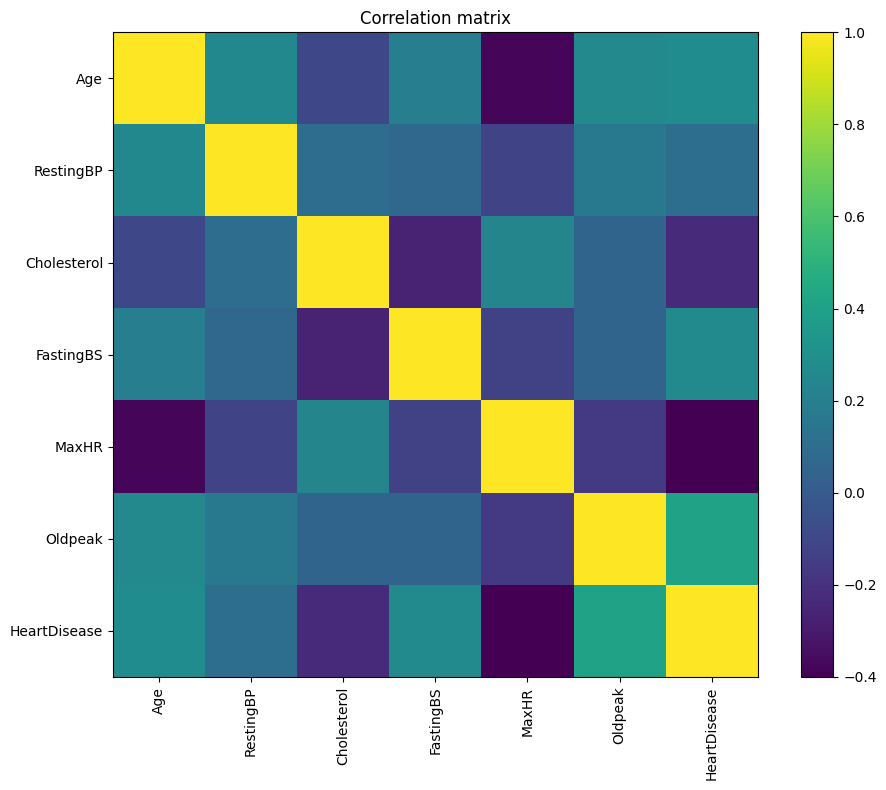

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [9]:
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr(numeric_only=True)

fig = plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest')
plt.title('Correlation matrix')
plt.colorbar()
tick_marks = np.arange(len(corr.columns))
plt.xticks(tick_marks, corr.columns, rotation=90)
plt.yticks(tick_marks, corr.columns)
plt.tight_layout()
plt.show()

corr

## 9. Scatter matrix (selected numerical features)
Visual exploration of pairwise relations among a subset of important features (diagonal shows KDE).

<Figure size 1000x1000 with 0 Axes>

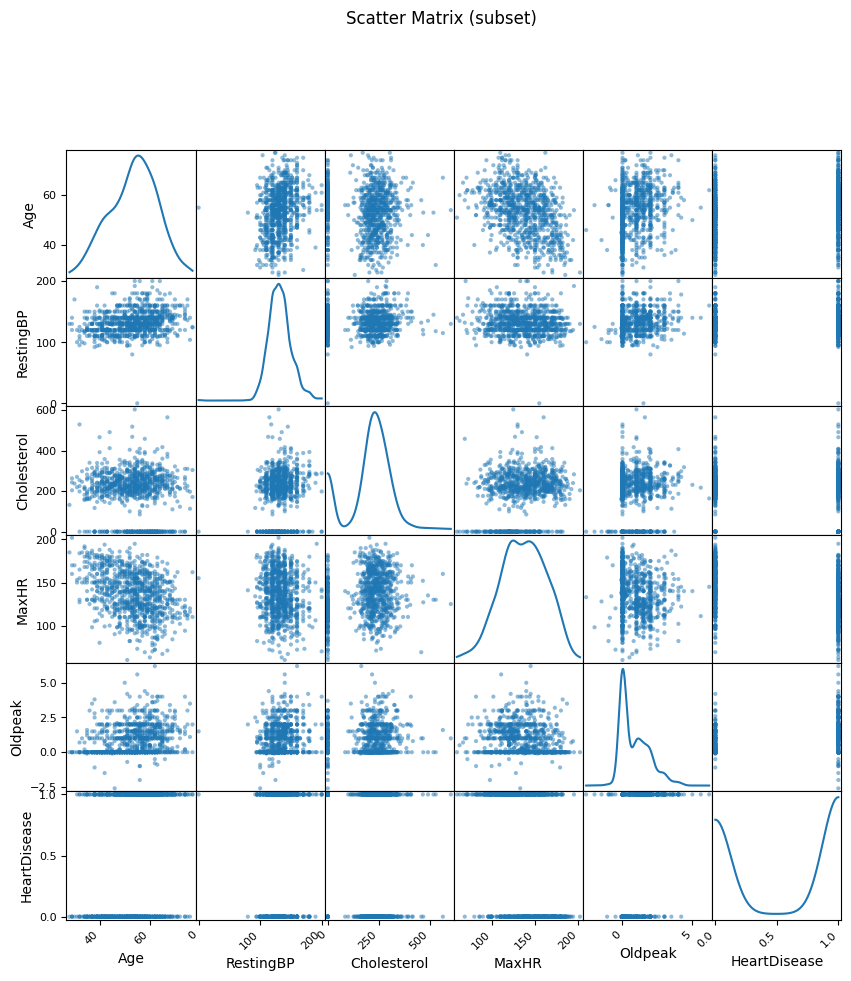

In [10]:
from pandas.plotting import scatter_matrix

cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
use_cols = [c for c in cols if c in df.columns]

fig = plt.figure(figsize=(10,10))
axes = scatter_matrix(df[use_cols], figsize=(10,10), diagonal='kde')
# Migliora spaziatura dei tick
for ax in axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Scatter Matrix (subset)', y=1.02)
plt.show()

## 10. Boxplots — continuous variables vs HeartDisease
Compare the distributions of continuous features across target classes to detect potential shifts/outliers.

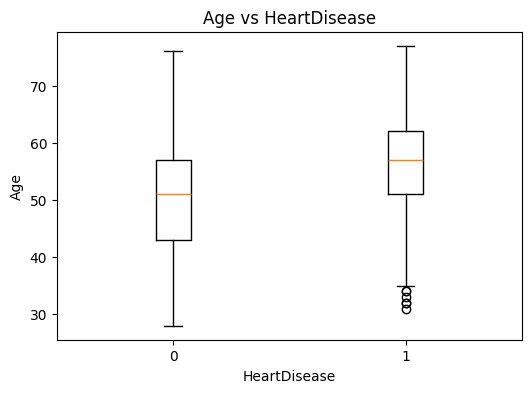

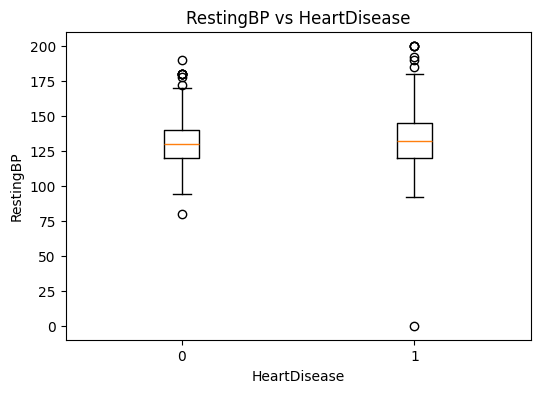

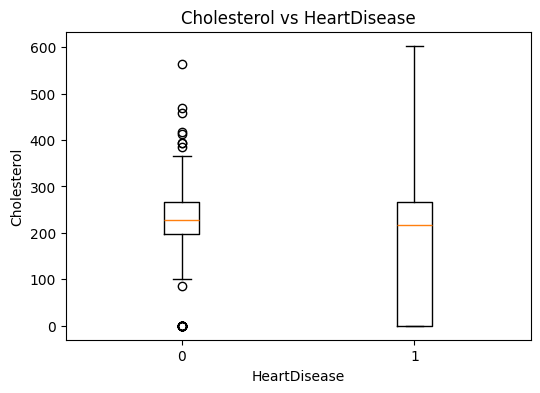

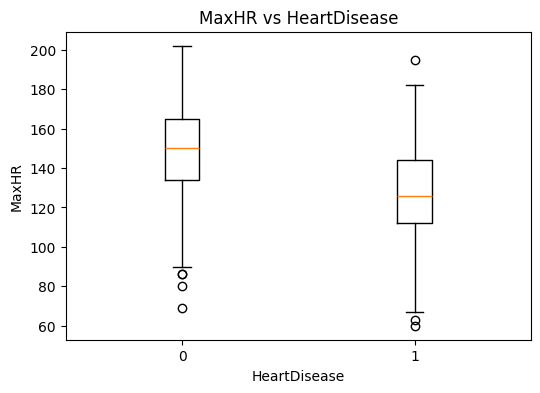

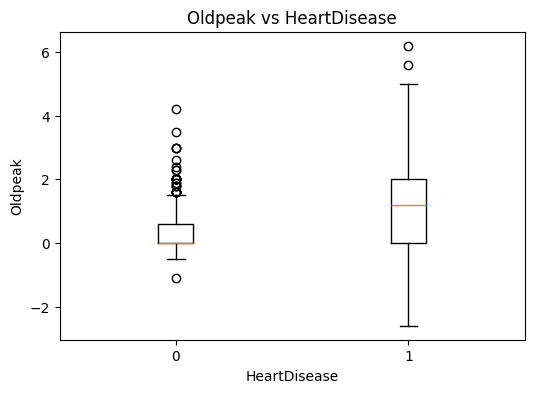

In [11]:
continuous = [c for c in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] if c in df.columns]

for col in continuous:
    fig = plt.figure(figsize=(6,4))
    groups = [df[df['HeartDisease']==t][col].dropna() for t in sorted(df['HeartDisease'].unique())]
    plt.boxplot(groups, labels=[str(t) for t in sorted(df['HeartDisease'].unique())])
    plt.title(f'{col} vs HeartDisease')
    plt.xlabel('HeartDisease')
    plt.ylabel(col)
    plt.show()

## 11. Bar charts — categorical variables vs HeartDisease
Grouped bar charts from crosstabs to compare category counts by target class.

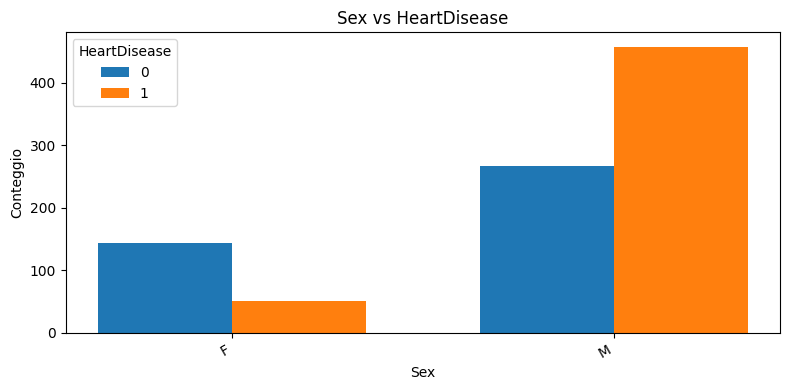

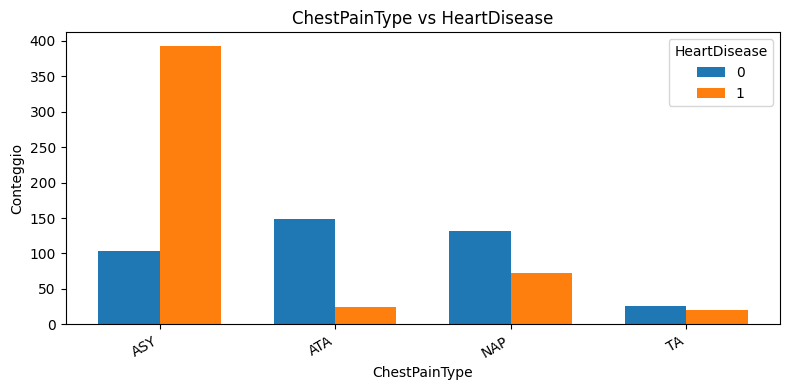

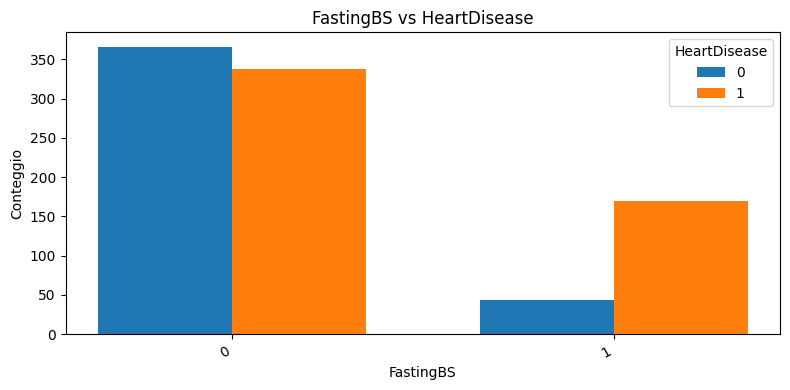

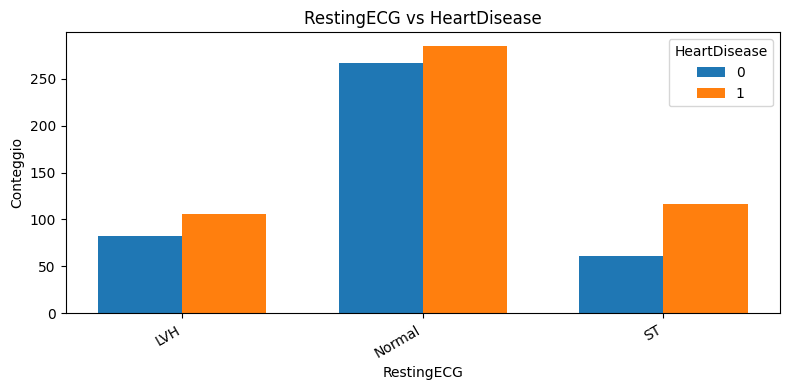

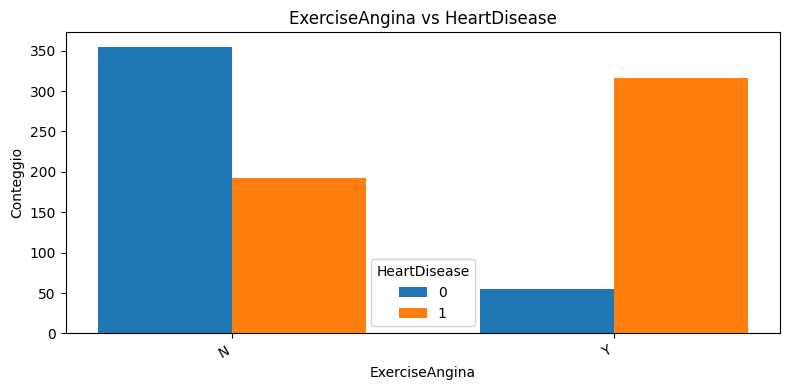

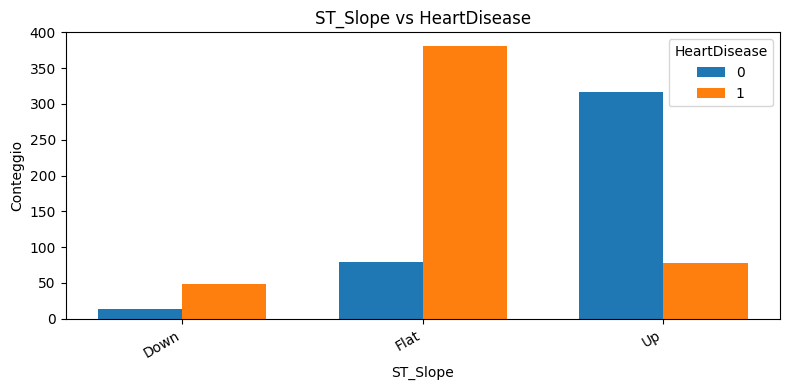

In [12]:
categorical = [c for c in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] if c in df.columns]

for col in categorical:
    ct = pd.crosstab(df[col], df['HeartDisease'])
    categories = ct.index.astype(str).tolist()
    targets = ct.columns.tolist()

    fig = plt.figure(figsize=(8,4))
    x = np.arange(len(categories))
    width = 0.35 if len(targets)==2 else 0.2

    for i, t in enumerate(targets):
        plt.bar(x + i*width, ct[t].values, width=width, label=str(t))

    plt.title(f'{col} vs HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(x + (len(targets)-1)*width/2, categories, rotation=30, ha='right')
    plt.legend(title='HeartDisease')
    plt.tight_layout()
    plt.show()